# DataMadness
## Biodiversity
**OECD Statistics:** -> Environment -> Biodiversity -> both Red List Index and Threatened Species Datasets

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model as lm

# 1) 2023 Threatened species dataset 

After some cleaning/merging ect. we created three different datasets:
- **Critically Endangered Species** : - Number of critically endangered species 
- **Vulnerable Species** - Number of vulnerable species 
- **Total Threatened Species** - Total number of threatened species 

For this dataset there are a total of: 
- 37 countries
- 9 groups of species

In [2]:
critical = pd.read_csv('crit_end_species.csv')
vulnerable = pd.read_csv('vulnerable_species.csv')
threatened = pd.read_csv('tot_threat_species.csv')

In [3]:
def general_bar(data, title_name):
    general_data = data.drop(columns = ['Country'])
    general_data_total = general_data.sum()
    general_data_total.plot.bar(x = 'Species', rot = 0, figsize = (12,8), title = title_name)

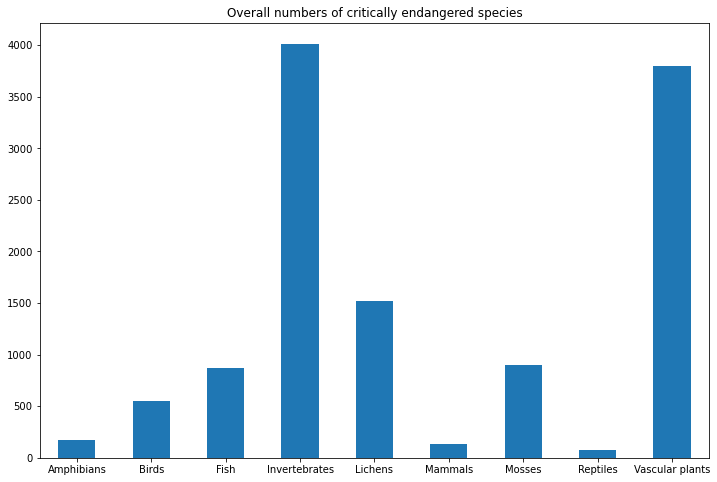

In [4]:
general_bar(critical, "Overall numbers of critically endangered species")

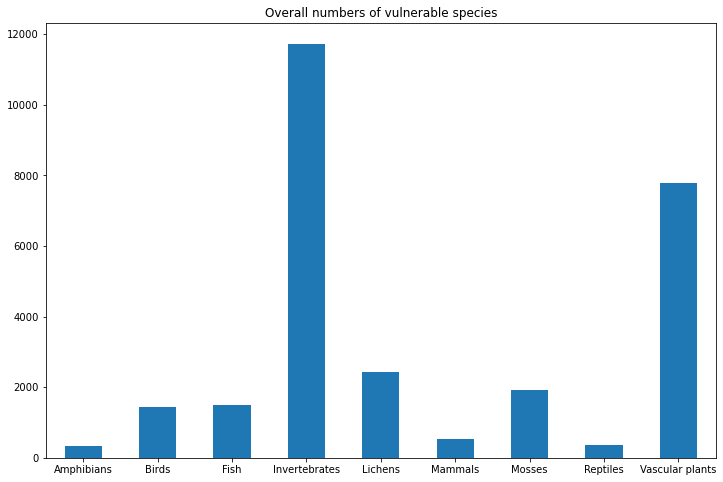

In [5]:
general_bar(vulnerable, "Overall numbers of vulnerable species")

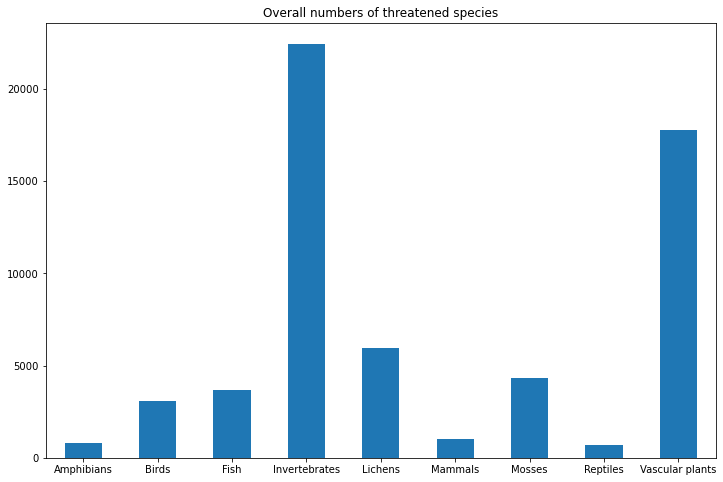

In [6]:
general_bar(threatened, "Overall numbers of threatened species")

# Threatened species as % of known species

Now looking at the **Threatened species as % of known species**: We mainly used this to understand the percentage of species that is threatened for different countries around the world.
There are a total of 37 countries, and the list of countries (commented below) are the ones that were explored and used for the video presentation.

In [7]:
perc_threatened = pd.read_csv('final_threatened_species.csv')
perc_threatened.head()

,Country,Amphibians,Birds,Fish,Invertebrates,Lichens,Mammals,Mosses,Reptiles,Vascular plants
0,Australia,16.318,16.917,13.352,0.062,0.000,28.382,0.050,5.530,5.883
1,Austria,57.143,28.821,78.788,1.811,21.095,25.962,23.425,64.286,35.756
2,Belgium,31.579,27.778,69.448,10.806,59.069,21.429,26.871,40.000,23.267
3,Brazil,4.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,Canada,39.130,14.038,32.946,7.362,12.253,24.775,28.826,64.444,18.194


In [8]:
# 37 countries
countries = perc_threatened['Country'].to_list()

In [9]:
# Australia
# Italy
# Spain
# Sweden
# Iceland
# Mexico
# Canada
# Chile
# Columbia
# Japan
# Korea

In [10]:
perc_threatened.loc[perc_threatened['Country'] == 'Australia']

,Country,Amphibians,Birds,Fish,Invertebrates,Lichens,Mammals,Mosses,Reptiles,Vascular plants
0,Australia,16.318,16.917,13.352,0.062,0.0,28.382,0.05,5.53,5.883


In [11]:
perc_threatened.loc[perc_threatened['Country'] == 'Italy']

,Country,Amphibians,Birds,Fish,Invertebrates,Lichens,Mammals,Mosses,Reptiles,Vascular plants
18,Italy,31.818,24.101,37.149,0.778,5.658,18.254,19.603,19.643,7.649


In [12]:
perc_threatened.loc[perc_threatened['Country'] == 'Spain']

,Country,Amphibians,Birds,Fish,Invertebrates,Lichens,Mammals,Mosses,Reptiles,Vascular plants
32,Spain,23.077,10.625,46.58,0.554,0.0,15.116,5.085,18.095,13.723


In [13]:
perc_threatened.loc[perc_threatened['Country'] == 'Sweden']

,Country,Amphibians,Birds,Fish,Invertebrates,Lichens,Mammals,Mosses,Reptiles,Vascular plants
33,Sweden,23.077,21.344,39.821,2.804,0.0,13.846,14.808,33.333,16.719


In [14]:
perc_threatened.loc[perc_threatened['Country'] == 'Mexico']

,Country,Amphibians,Birds,Fish,Invertebrates,Lichens,Mammals,Mosses,Reptiles,Vascular plants
24,Mexico,14.044,21.755,37.405,0.0,0.0,26.241,0.2,17.838,2.43


In [15]:
perc_threatened.loc[perc_threatened['Country'] == 'Canada']

,Country,Amphibians,Birds,Fish,Invertebrates,Lichens,Mammals,Mosses,Reptiles,Vascular plants
4,Canada,39.13,14.038,32.946,7.362,12.253,24.775,28.826,64.444,18.194


In [16]:
perc_threatened.loc[perc_threatened['Country'] == 'Chile']

,Country,Amphibians,Birds,Fish,Invertebrates,Lichens,Mammals,Mosses,Reptiles,Vascular plants
5,Chile,67.692,9.02,54.461,0.974,0.145,19.459,0.975,37.143,6.98


In [17]:
perc_threatened.loc[perc_threatened['Country'] == 'Colombia']

,Country,Amphibians,Birds,Fish,Invertebrates,Lichens,Mammals,Mosses,Reptiles,Vascular plants
6,Colombia,34.328,6.397,6.229,0.431,0.0,6.814,2.561,6.897,1.744


In [18]:
perc_threatened.loc[perc_threatened['Country'] == 'Japan']

,Country,Amphibians,Birds,Fish,Invertebrates,Lichens,Mammals,Mosses,Reptiles,Vascular plants
19,Japan,51.648,14.0,46.962,1.226,3.938,21.25,13.333,37.0,25.571


# 2) The Red List Index Dataset

According to the datasheet on OECD, the **RED LIST INDEX**: "**measures change in aggregate extinction risk across groups of species.** It is based on genuine changes in the number of species in each category of extinction risk on The IUCN Red List of Threatened Species (www.iucnredlist.org) is expressed as changes in **an index ranging from 0 to 1.** Indicates how far the set of species has moved overall towards extinction."

How the values work: 

- **1 (all species are categorized as ‘Least Concern')** 
- **0 (all species are categorized as ‘Extinct')**

Data: 32 countries from 2001 to 2020

In [19]:
red_list = pd.read_csv('species_redList.csv')
red_list = red_list.fillna(0)
red_list.head()

,Country,Year,Value
0,Australia,2001,0.877
1,Australia,2002,0.873
2,Australia,2003,0.871
3,Australia,2004,0.868
4,Australia,2005,0.864


## "Concerned" Species In the Netherlands throughout the years

In [20]:
# Netherlands
netherlands_species = red_list.loc[red_list['Country'] == 'Netherlands']
netherlands_species = netherlands_species.reset_index(drop=True)
netherlands_species['Year'] = netherlands_species['Year'].astype('string')
netherlands_species.head()

,Country,Year,Value
0,Netherlands,2001,0.966
1,Netherlands,2002,0.965
2,Netherlands,2003,0.963
3,Netherlands,2004,0.962
4,Netherlands,2005,0.960


Text(0, 0.5, 'Red List Index of species survival')

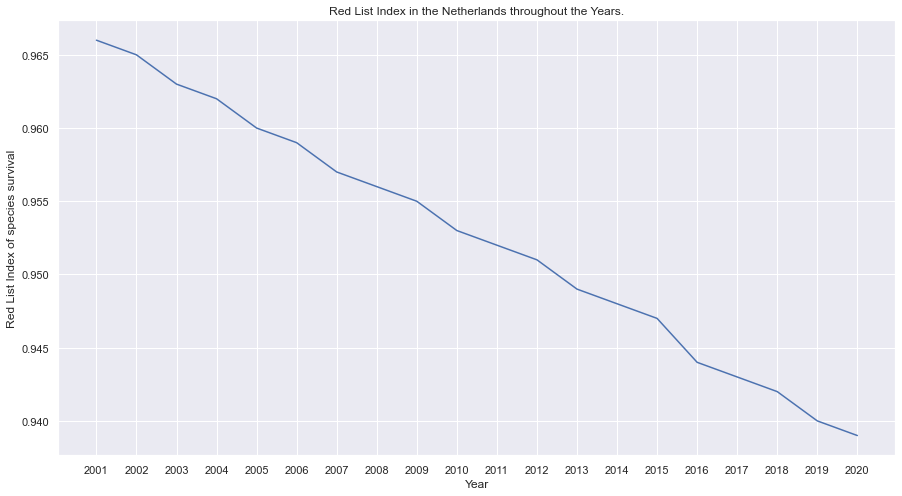

In [21]:
# Closer to 1 is least concerned - The lower is goes the more concern - until 0 which is extinct 
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x='Year', y='Value', data=netherlands_species)
plt.title ('Red List Index in the Netherlands throughout the Years.')
plt.xlabel('Year')
plt.ylabel('Red List Index of species survival')

## All species throughout the years
### Using the mean

In [22]:
years_red_list = red_list[['Year', 'Value']].copy()
grouped = years_red_list.groupby("Year")
average_grouped = grouped.mean()
average_grouped = average_grouped.reset_index()
average_grouped['Year'] = average_grouped['Year'].astype('string')
average_grouped.head(20)

,Year,Value
0,2001,0.924313
1,2002,0.923687
2,2003,0.923063
3,2004,0.922469
4,2005,0.921937
5,2006,0.921469
6,2007,0.920969
7,2008,0.920469
8,2009,0.920031
9,2010,0.919719


Text(0, 0.5, 'Red List Index of species survival')

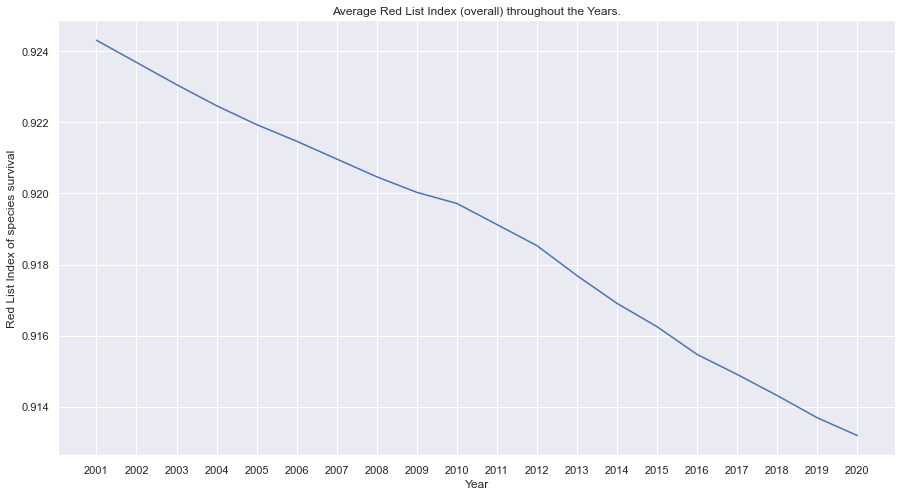

In [23]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x='Year', y='Value', data=average_grouped)
plt.title ('Average Red List Index (overall) throughout the Years.')
plt.xlabel('Year')
plt.ylabel('Red List Index of species survival')

# Correlation between pollutants, climate-related hazards and Red List index value

From the plot below we can see that the red list index value is most correlated with the total emissions

In [24]:
pollutants = pd.read_csv('pollutants_species.csv')
pollutants = pollutants.fillna(0)

In [25]:
pollutants['Value']= red_list['Value']
pollutants.head()

,Country,Year,Carbon Monoxide Agriculture,Carbon Monoxide Combustion,Carbon Monoxide Industrial combustion,Carbon Monoxide Industrial processes and product use,Carbon Monoxide Miscellaneous,Carbon Monoxide Other Mobile Sources,Carbon Monoxide Other combustion,Carbon Monoxide Power stations,...,"Sulphur Oxides Total emissions per unit of GDP, Kg per 1000 USD","Sulphur Oxides Total emissions, Index 1990 = 100","Sulphur Oxides Total emissions, Index 2000 = 100",Sulphur Oxides Total man-made emissions,Sulphur Oxides Waste,drought,flood,wildfire,wind,Value
0,Australia,2001.0,538.311,1029.561,192.755,10.632,19.592,352.097,836.806,66.477,...,3.442,163.037,110.329,2584.435,0.0,-1.555795,0.925584,900401.4277,76.026778,0.877
1,Australia,2002.0,554.604,896.946,203.296,10.355,17.358,359.073,693.650,72.754,...,3.584,175.049,118.458,2774.853,0.0,-30.560191,0.925584,761169.0155,76.355006,0.873
2,Australia,2003.0,261.322,946.955,227.666,12.087,14.877,367.011,719.290,68.788,...,3.439,175.030,118.445,2774.556,0.0,-6.096639,0.925584,374209.8141,76.900698,0.871
3,Australia,2004.0,536.804,934.548,236.890,12.641,14.909,380.858,697.658,77.134,...,3.019,158.486,107.250,2512.307,0.0,-7.528358,0.925584,607280.0186,77.029780,0.868
4,Australia,2005.0,355.032,929.549,256.683,10.042,14.097,394.103,672.867,85.404,...,2.948,158.980,107.584,2520.124,0.0,-9.605953,0.925584,302423.1314,76.847153,0.864


In [26]:
def correlations(data, n):
    correl_matrix = data.corr()
    corr_series = correl_matrix['Value'].nlargest(n)
    return correl_matrix, corr_series

In [27]:
correl_matrix, most_correlated = correlations(pollutants, 21)
correlated_col = most_correlated.index.tolist()

In [28]:
def corr_plot(data, columns):
    plt.figure(figsize=(16, 6))
    corr_mat = data[columns].corr()
    mask = np.triu(np.ones_like(corr_mat, dtype=np.bool))
    heatmap = sns.heatmap(corr_mat, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
    plt.show()

<ipython-input-28-6deeebc642ce>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_mat, dtype=np.bool))


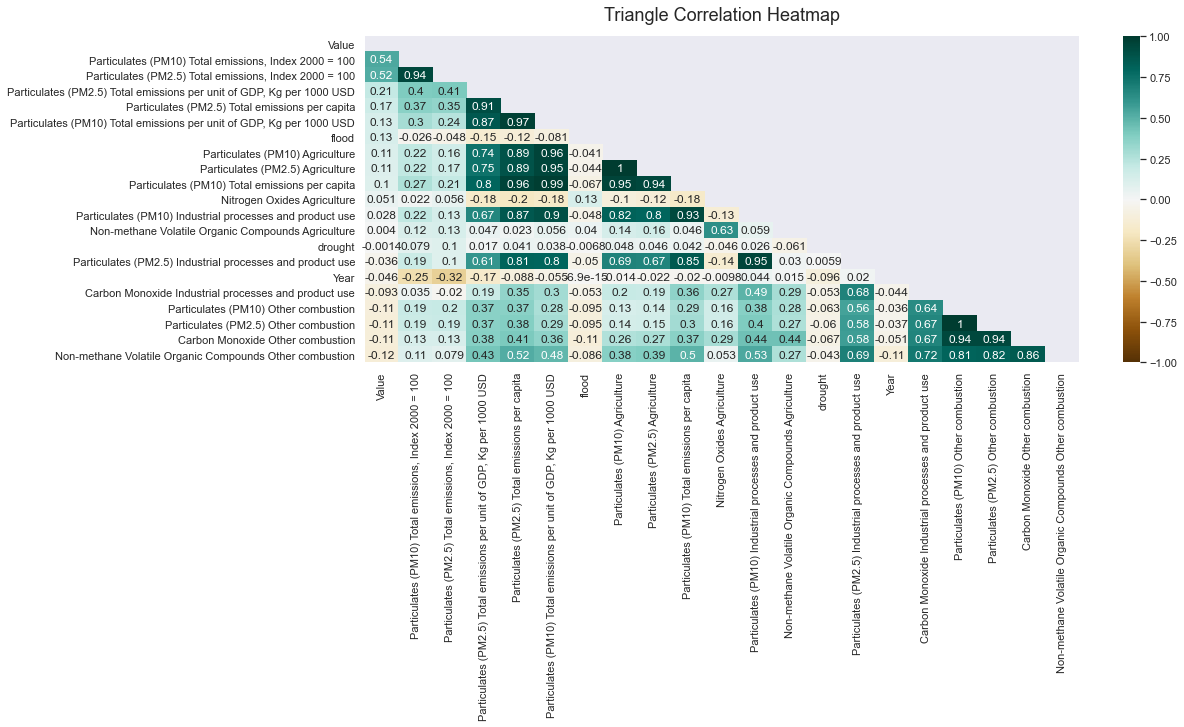

In [29]:
corr_plot(pollutants, correlated_col)